In [1]:
import mysql.connector

In [2]:
remote = mysql.connector.connect(
    host = "eda-database.c3oek28e8yta.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "rlawlswo1",
    database = "workspace"
)

In [3]:
import pandas as pd

In [4]:
interest_rate_addr = "../data/한미 정책금리.xlsx"
df = pd.read_excel(interest_rate_addr, header=6)
df.rename(columns={df.columns[0]:"date",
                   df.columns[1]:"k_interest_rate",
                   df.columns[2]:"usa_interest_rate"},
                   inplace=True)
df.set_index(df.columns[0], inplace=True)
df.head()

,k_interest_rate,usa_interest_rate
date,,
1982-09-27,NaN,10.25
1982-09-28,NaN,10.25
1982-09-29,NaN,10.25
1982-09-30,NaN,10.25
1982-10-01,NaN,10.00


In [5]:
# df.loc["20190901":]
corona_interval = df["2004-08-01":]
corona_interval

,k_interest_rate,usa_interest_rate
date,,
2004-08-01,3.75,1.25
2004-08-02,3.75,1.25
2004-08-03,3.75,1.25
2004-08-04,3.75,1.25
2004-08-05,3.75,1.25
...,...,...
2024-09-22,3.50,5.00
2024-09-23,3.50,5.00
2024-09-24,3.50,5.00


In [6]:
import numpy as np

In [7]:
month_init = corona_interval.index[0]

In [8]:
monthly = []
month = month_init[:-3]
before_k = 0.
before_usa = 0.
k = 0.
usa = 0.
for index, row in corona_interval.iterrows():
    # print(index, row["k_interest_rate"], row["usa_interest_rate"])

    # print(now_month)
    now_month = index[:-3]
    month_info = []
    
    if k != float(row["k_interest_rate"]):
        if str(row["k_interest_rate"]) != "nan":
            k = float(row["k_interest_rate"])
        # print(index, k)
    if usa != float(row["usa_interest_rate"]):
        if str(row["usa_interest_rate"]) != "nan":
            usa = float(row["usa_interest_rate"])
        # print(index, usa)

    if month != now_month:
        month_info.append(now_month)# + str("-01"))
        month_info.append(k)
        month_info.append(usa)

        monthly.append(month_info)

        month = now_month
        before_k = k
        before_usa = usa

if before_k != k or before_usa != usa:
    monthly[-1][1] = k
    monthly[-1][2] = usa
# print(before_k, before_usa, k, usa)
monthly


[['2004-09', 3.5, 1.5],
 ['2004-10', 3.5, 1.75],
 ['2004-11', 3.5, 1.75],
 ['2004-12', 3.25, 2.0],
 ['2005-01', 3.25, 2.25],
 ['2005-02', 3.25, 2.25],
 ['2005-03', 3.25, 2.5],
 ['2005-04', 3.25, 2.75],
 ['2005-05', 3.25, 2.75],
 ['2005-06', 3.25, 3.0],
 ['2005-07', 3.25, 3.25],
 ['2005-08', 3.25, 3.25],
 ['2005-09', 3.25, 3.5],
 ['2005-10', 3.25, 3.75],
 ['2005-11', 3.5, 4.0],
 ['2005-12', 3.5, 4.0],
 ['2006-01', 3.75, 4.25],
 ['2006-02', 3.75, 4.5],
 ['2006-03', 4.0, 4.5],
 ['2006-04', 4.0, 4.75],
 ['2006-05', 4.0, 4.75],
 ['2006-06', 4.0, 5.0],
 ['2006-07', 4.25, 5.25],
 ['2006-08', 4.25, 5.25],
 ['2006-09', 4.5, 5.25],
 ['2006-10', 4.5, 5.25],
 ['2006-11', 4.5, 5.25],
 ['2006-12', 4.5, 5.25],
 ['2007-01', 4.5, 5.25],
 ['2007-02', 4.5, 5.25],
 ['2007-03', 4.5, 5.25],
 ['2007-04', 4.5, 5.25],
 ['2007-05', 4.5, 5.25],
 ['2007-06', 4.5, 5.25],
 ['2007-07', 4.5, 5.25],
 ['2007-08', 4.75, 5.25],
 ['2007-09', 5.0, 5.25],
 ['2007-10', 5.0, 4.75],
 ['2007-11', 5.0, 4.5],
 ['2007-12', 5.0, 4.

In [9]:
monthly_df = pd.DataFrame(monthly, columns=["date", "k_interest_rate", "usa_interest_rate"])
monthly_df.set_index("date", inplace=True)
monthly_df.tail()

,k_interest_rate,usa_interest_rate
date,,
2024-05,3.5,5.5
2024-06,3.5,5.5
2024-07,3.5,5.5
2024-08,3.5,5.5
2024-09,3.5,5.0


In [10]:
monthly_df.head()

,k_interest_rate,usa_interest_rate
date,,
2004-09,3.50,1.50
2004-10,3.50,1.75
2004-11,3.50,1.75
2004-12,3.25,2.00
2005-01,3.25,2.25


In [19]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib.colors import ListedColormap
import matplotlib.ticker as ticker
from matplotlib import dates
import matplotlib.dates as mdates
import koreanize_matplotlib
import datetime

In [20]:
temp = list(monthly_df.index)
len(temp)
np.arange(0, len(temp), 12)

array([  0,  12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144,
       156, 168, 180, 192, 204, 216, 228, 240])

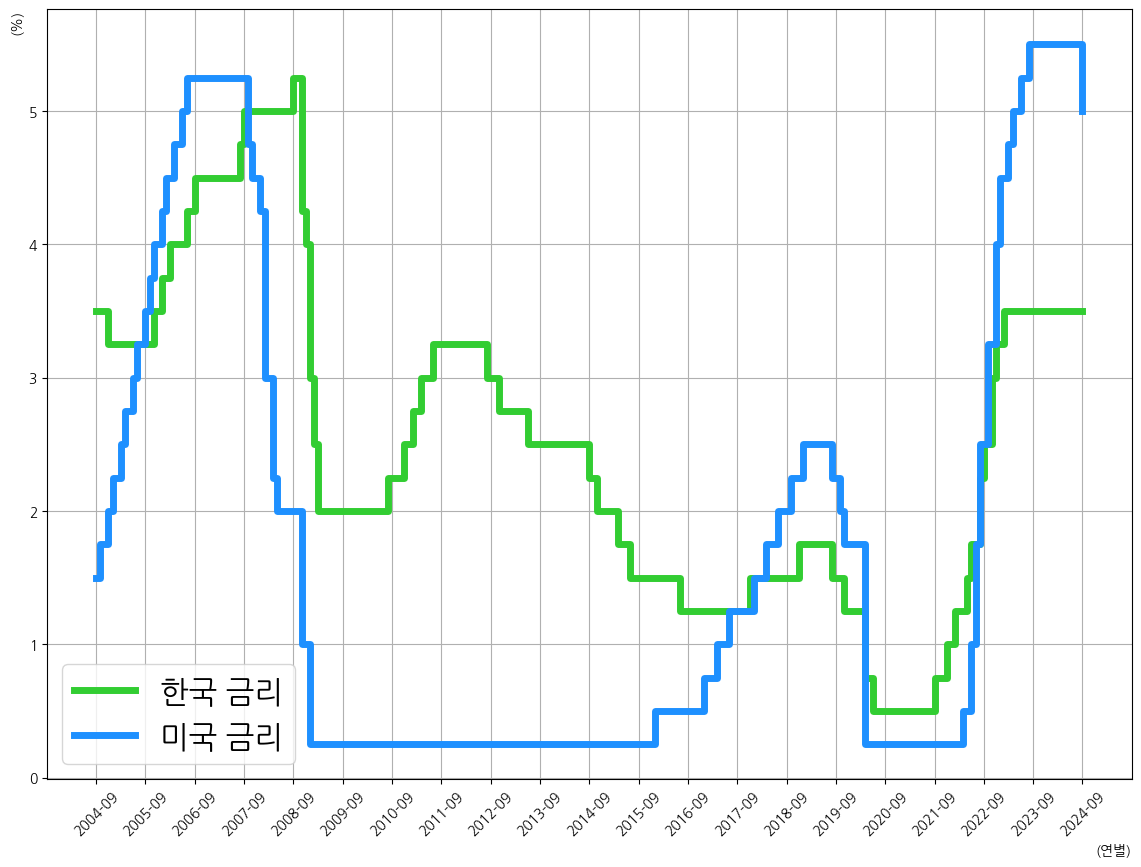

In [47]:
plt.figure(figsize=(14,10))
plt.plot(monthly_df.index, monthly_df["k_interest_rate"], drawstyle='steps-post', linewidth=5, color="limegreen")
plt.plot(monthly_df.index, monthly_df["usa_interest_rate"], drawstyle='steps-post', linewidth=5, color="dodgerblue")
plt.xticks(np.arange(0, len(temp), 12), rotation=45)
plt.grid()
plt.xlabel("(연별)", loc="right")
plt.ylabel("(%)", loc="top")
plt.legend(["한국 금리", "미국 금리"], fontsize=22)
plt.savefig("../data/interest_rate.png")
plt.show()

In [14]:
remote = mysql.connector.connect(
    host = "eda-database.c3oek28e8yta.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "rlawlswo1",
    database = "workspace"
)

In [15]:
cur = remote.cursor()

sql = open("../sql_script/insert_interest_rate.sql").read()
for index, row in monthly_df.iterrows():
    temp = [index, row["k_interest_rate"], row["usa_interest_rate"]]
    print(temp)
    cur.execute(sql, tuple(temp))
    remote.commit()

cur.execute("select * from interest_rate")
result = cur.fetchall()
for row in result:
    print(row)

['2004-09-01', np.float64(3.5), np.float64(1.5)]
['2004-10-01', np.float64(3.5), np.float64(1.75)]
['2004-11-01', np.float64(3.5), np.float64(1.75)]
['2004-12-01', np.float64(3.25), np.float64(2.0)]
['2005-01-01', np.float64(3.25), np.float64(2.25)]
['2005-02-01', np.float64(3.25), np.float64(2.25)]
['2005-03-01', np.float64(3.25), np.float64(2.5)]
['2005-04-01', np.float64(3.25), np.float64(2.75)]
['2005-05-01', np.float64(3.25), np.float64(2.75)]
['2005-06-01', np.float64(3.25), np.float64(3.0)]
['2005-07-01', np.float64(3.25), np.float64(3.25)]
['2005-08-01', np.float64(3.25), np.float64(3.25)]
['2005-09-01', np.float64(3.25), np.float64(3.5)]
['2005-10-01', np.float64(3.25), np.float64(3.75)]
['2005-11-01', np.float64(3.5), np.float64(4.0)]
['2005-12-01', np.float64(3.5), np.float64(4.0)]
['2006-01-01', np.float64(3.75), np.float64(4.25)]
['2006-02-01', np.float64(3.75), np.float64(4.5)]
['2006-03-01', np.float64(4.0), np.float64(4.5)]
['2006-04-01', np.float64(4.0), np.float64(4.7

In [16]:
remote.close()